In [1]:
import requests
import pandas as pd
from zipfile import ZipFile
from io import BytesIO
from pprint import pprint
import os
import matplotlib.pyplot as plt

In [2]:
# do pobrania ze strony przydaje sie nazwa pliku i url
csv_path_dict={}
main_url = r"https://s3.amazonaws.com/baywheels-data/"
years = ["2020","2021"]
for year in years:
    for month in range(1,13):
        month = str(month).zfill(2)
        file_name = f"{year}{month}-baywheels-tripdata.csv"
        url2zip = main_url + file_name + ".zip"
        csv_path_dict[file_name] = url2zip
pprint(csv_path_dict)

{'202001-baywheels-tripdata.csv': 'https://s3.amazonaws.com/baywheels-data/202001-baywheels-tripdata.csv.zip',
 '202002-baywheels-tripdata.csv': 'https://s3.amazonaws.com/baywheels-data/202002-baywheels-tripdata.csv.zip',
 '202003-baywheels-tripdata.csv': 'https://s3.amazonaws.com/baywheels-data/202003-baywheels-tripdata.csv.zip',
 '202004-baywheels-tripdata.csv': 'https://s3.amazonaws.com/baywheels-data/202004-baywheels-tripdata.csv.zip',
 '202005-baywheels-tripdata.csv': 'https://s3.amazonaws.com/baywheels-data/202005-baywheels-tripdata.csv.zip',
 '202006-baywheels-tripdata.csv': 'https://s3.amazonaws.com/baywheels-data/202006-baywheels-tripdata.csv.zip',
 '202007-baywheels-tripdata.csv': 'https://s3.amazonaws.com/baywheels-data/202007-baywheels-tripdata.csv.zip',
 '202008-baywheels-tripdata.csv': 'https://s3.amazonaws.com/baywheels-data/202008-baywheels-tripdata.csv.zip',
 '202009-baywheels-tripdata.csv': 'https://s3.amazonaws.com/baywheels-data/202009-baywheels-tripdata.csv.zip',
 

In [3]:
# pliki pobierane i zapisane w lokalizacji, przy nastepnych uruchomieniach korzystam z plikow juz zapisanych
dfs = []
item = 0
main_path = r"C:\Users\user\OneDrive\Dokumenty\pandas_data"

for name, url in csv_path_dict.items():
    file_path = os.path.join(main_path, name + ".zip")
    
    if not os.path.isfile(file_path):
        print(f"downloading file {name}.zip to {main_path}")
        r = requests.get(url)
        with open(file_path, "wb") as fd:
            for chunk in r.iter_content(chunk_size=512):
                fd.write(chunk)
    else:
        print(f"file {file_path} arleady on disc")

    zf = ZipFile(file_path)
    data = pd.read_csv(zf.open(name), chunksize=100000, dtype={"rental_acces_method":"object"}, iterator=True)
    data1 = pd.concat(data, ignore_index=True)
    item += 1

    #some columns have different name but the same type data, that why change of name below
    if "started_at" in data1.columns:
        data1.rename(columns = {'started_at':'start_time'}, inplace = True)
    if "ended_at" in data1.columns:
        data1.rename(columns = {'ended_at':'end_time'}, inplace = True)
    if "start_lat" in data1.columns:
        data1.rename(columns = {'start_lat':'start_station_latitude'}, inplace = True)
    if "start_lng" in data1.columns:
        data1.rename(columns = {'start_lng':'start_station_longitude'}, inplace = True)
    if "end_lat" in data1.columns:
        data1.rename(columns = {'end_lat':'end_station_latitude'}, inplace = True)
    if "end_lng" in data1.columns:
        data1.rename(columns = {'end_lng':'end_station_longitude'}, inplace = True)
    if "user_type" in data1.columns:
        data1.rename(columns = {'user_type':'member_casual'}, inplace = True)
    
    dfs.append(data1)
    print(rf'file {item}/{len(csv_path_dict)} - {name} loaded to pandas')
df = pd.concat(dfs, ignore_index=True)
print("***Loading dataframe completed***")

file C:\Users\user\OneDrive\Dokumenty\pandas_data\202001-baywheels-tripdata.csv.zip arleady on disc
file 1/24 - 202001-baywheels-tripdata.csv loaded to pandas
file C:\Users\user\OneDrive\Dokumenty\pandas_data\202002-baywheels-tripdata.csv.zip arleady on disc
file 2/24 - 202002-baywheels-tripdata.csv loaded to pandas
file C:\Users\user\OneDrive\Dokumenty\pandas_data\202003-baywheels-tripdata.csv.zip arleady on disc
file 3/24 - 202003-baywheels-tripdata.csv loaded to pandas
file C:\Users\user\OneDrive\Dokumenty\pandas_data\202004-baywheels-tripdata.csv.zip arleady on disc
file 4/24 - 202004-baywheels-tripdata.csv loaded to pandas
file C:\Users\user\OneDrive\Dokumenty\pandas_data\202005-baywheels-tripdata.csv.zip arleady on disc
file 5/24 - 202005-baywheels-tripdata.csv loaded to pandas
file C:\Users\user\OneDrive\Dokumenty\pandas_data\202006-baywheels-tripdata.csv.zip arleady on disc
file 6/24 - 202006-baywheels-tripdata.csv loaded to pandas
file C:\Users\user\OneDrive\Dokumenty\pandas_d

In [4]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180790 entries, 0 to 4180789
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             float64
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         object 
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           object 
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  float64
 12  member_casual            object 
 13  rental_access_method     object 
 14  ride_id                  object 
 15  rideable_type            object 
dtypes: float64(6), object(10)
memory usage: 510.4+ MB


In [5]:
df["start_time"] = pd.DatetimeIndex(df["start_time"]) # change format of column to DateTime
df["end_time"] = pd.DatetimeIndex(df["end_time"])
df["duration_sec"] = df["end_time"] - df["start_time"]
df["duration_sec"] = df["duration_sec"].dt.total_seconds() # change format of column to seconds

In [6]:
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,member_casual,rental_access_method,ride_id,rideable_type
0,83118.530,2020-01-31 15:23:47.733,2020-02-01 14:29:06.263,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052.0,Customer,NaN,NaN,NaN
1,68239.384,2020-01-31 15:40:31.616,2020-02-01 10:37:51.000,99.0,Folsom St at 15th St,37.767037,-122.415442,99.0,Folsom St at 15th St,37.767037,-122.415442,12235.0,Subscriber,NaN,NaN,NaN
2,55407.682,2020-01-31 17:48:16.635,2020-02-01 09:11:44.317,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822.0,Customer,NaN,NaN,NaN


In [7]:
df.tail(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,member_casual,rental_access_method,ride_id,rideable_type
4180787,848.0,2021-12-01 11:04:31,2021-12-01 11:18:39,SF-L20,Church St at Duboce Ave,37.769818,-122.429148,NaN,NaN,37.780000,-122.440000,NaN,casual,NaN,DE1C9E261375F593,classic_bike
4180788,2370.0,2021-12-04 12:24:28,2021-12-04 13:03:58,SF-L20,Church St at Duboce Ave,37.769737,-122.429295,NaN,NaN,37.760000,-122.500000,NaN,casual,NaN,927954A40EE38BA1,electric_bike
4180789,173.0,2021-12-24 00:27:08,2021-12-24 00:30:01,SF-R24,Garfield Square (25th St at Harrison St),37.750962,-122.412028,SF-R24,Garfield Square (25th St at Harrison St),37.750945,-122.412083,NaN,member,NaN,B25F58DE9C2BE99C,electric_bike


In [8]:
#zad2.1
# general description for column 'duration_sec'
desc_dur = df["duration_sec"].describe()
desc_dur

count    4.180790e+06
mean     1.281042e+03
std      3.035676e+04
min     -1.736593e+06
25%      3.880000e+02
50%      6.590000e+02
75%      1.097000e+03
max      1.734500e+07
Name: duration_sec, dtype: float64

In [9]:
#check how many values of duration are below 0
df.loc[df['duration_sec']<0]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,member_casual,rental_access_method,ride_id,rideable_type
919399,-13.0,2020-04-24 18:08:51,2020-04-24 18:08:38,SF-M30,4th St at 16th St,37.767045,-122.390833,SF-J22-2,Grove St at Gough St,37.777870,-122.422953,NaN,casual,NaN,CCC2CEF36058AFCB,docked_bike
923656,-28.0,2020-04-14 17:05:06,2020-04-14 17:04:38,SF-H13,Arguello Blvd at Edward St,37.778487,-122.458645,SF-J1,48th Ave at Cabrillo St,37.772954,-122.509071,NaN,casual,NaN,06B4977436F9E439,docked_bike
923985,-29.0,2020-04-19 11:36:04,2020-04-19 11:35:35,SJ-M10-1,San Jose City Hall,37.337391,-121.886995,SJ-M10-1,San Jose City Hall,37.337391,-121.886995,NaN,casual,NaN,6E6DC69EB50FD088,docked_bike
937140,-33.0,2020-04-05 12:13:07,2020-04-05 12:12:34,OK-I9,El Embarcadero at Grand Ave,37.808848,-122.249680,EM-D2,Horton St at 40th St,37.829705,-122.287610,NaN,member,NaN,3D176CC3D138FCA1,docked_bike
937430,-12.0,2020-04-14 13:21:23,2020-04-14 13:21:11,SJ-M11-2,San Fernando St at 7th St,37.337122,-121.883215,SJ-P10,5th St at Virginia St,37.325998,-121.877120,NaN,member,NaN,830273BEC203EF29,docked_bike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4006114,-1340.0,2021-11-07 01:36:30,2021-11-07 01:14:10,NaN,NaN,37.760000,-122.420000,NaN,NaN,37.770000,-122.440000,NaN,casual,NaN,4C78DE24E8B04AE5,electric_bike
4024642,-58.0,2021-11-07 01:06:22,2021-11-07 01:05:24,SF-G27,Powell St BART Station (Market St at 4th St),37.786071,-122.405306,SF-F28-2,Montgomery St BART Station (Market St at 2nd St),37.789431,-122.401023,NaN,member,NaN,4915801A1453A26C,electric_bike
4026888,-2395.0,2021-11-07 01:57:47,2021-11-07 01:17:52,SF-L25,11th St at Bryant St,37.770110,-122.411897,SF-J13,McAllister St at Arguello Blvd,37.775276,-122.458150,NaN,casual,NaN,58E3E4FF8A940EBE,electric_bike
4027335,-2192.0,2021-11-07 01:54:11,2021-11-07 01:17:39,SF-L25,11th St at Bryant St,37.770097,-122.411917,SF-J13,McAllister St at Arguello Blvd,37.775281,-122.458166,NaN,casual,NaN,6F4D51D17CAD76BE,electric_bike


In [10]:
# because there are values below 0 i think that it is mistaken start with end time
# in that case swap start with end
cond = df["duration_sec"] < 0
df["temp"] = df["end_time"]
df.loc[cond, "end_time"] = df["start_time"]
df.loc[cond, "start_time"] = df["temp"]
df.drop("temp", axis=1, inplace=True)


#again calculate duration_sec and display description
df["duration_sec"] = df["end_time"] - df["start_time"]
df["duration_sec"] = df["duration_sec"].dt.total_seconds() # change format of column to seconds
desc_dur = df["duration_sec"].describe()
desc_dur

count    4.180790e+06
mean     1.300789e+03
std      3.035592e+04
min      0.000000e+00
25%      3.880000e+02
50%      6.590000e+02
75%      1.097000e+03
max      1.734500e+07
Name: duration_sec, dtype: float64

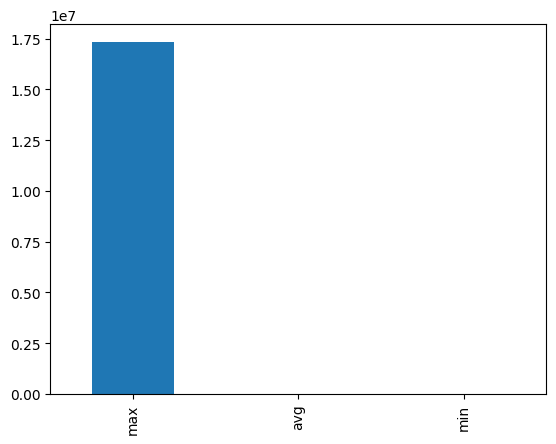

In [11]:
#zad2.1.1
duration_stat = pd.Series([df['duration_sec'].max(), df['duration_sec'].mean(), df['duration_sec'].min()], ['max', 'avg', 'min' ], name = 'duration_stat' )
duration_stat.plot.bar()
plt.show()

In [12]:
df['duration_sec'].max()

17344998.0

In [13]:
#there is such value, more than half year!
df.loc[df["duration_sec"] == 17344998]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,member_casual,rental_access_method,ride_id,rideable_type
1180921,17344998.0,2020-06-01 02:50:48,2020-12-18 20:54:06,SF-K22-2,McCoppin St at Valencia St,37.77168,-122.422301,SF Depot,Minnesota St Depot,37.754856,-122.389734,NaN,casual,NaN,E303F91209C563AB,docked_bike


In [14]:
pd.Series([df['duration_sec'].max(), df['duration_sec'].mean(), df['duration_sec'].min()], ['max', 'avg', 'min' ], name = 'duration_stat' )

max    1.734500e+07
avg    1.300789e+03
min    0.000000e+00
Name: duration_stat, dtype: float64

In [15]:
#zad2.2
stations_list = df["start_station_name"] + df["end_station_name"]
unique_stations_list = stations_list.unique()
print(f"stations_list = {unique_stations_list}")
print(f"Liczba unikalnych zarejestrowanych stacji = {len(unique_stations_list)}")

stations_list = ['Buchanan St at North Point StBuchanan St at North Point St'
 'Folsom St at 15th StFolsom St at 15th St'
 'El Embarcadero at Grand AveEl Embarcadero at Grand Ave' ...
 '22nd St at Dolores St2nd St at Folsom St'
 'Frida Kahlo Way at Cloud CirCivic Center/UN Plaza BART Station (Market St at McAllister St)'
 'Telegraph Ave at Carleton StMarket St at 40th St']
Liczba unikalnych zarejestrowanych stacji = 75478


In [16]:
#zad2.3
years = [2020, 2021]
df["start_year"] = df["start_time"].dt.year

# dfy = df[df["start_year"] == 2021]
# df[df["start_year"] == 2021]["duration_sec"].max()
# df[df["start_year"] == 2021]["duration_sec"].min()
for year in years:
    min_dur = df[df["start_year"] == year]["duration_sec"].min()
    max_dur = df[df["start_year"] == year]["duration_sec"].max()
    print("bike_id for max")
    display(df[df["duration_sec"]==max_dur]["bike_id"])
    print("bike_id for min")
    display(df[df["duration_sec"]==min_dur]["bike_id"])
    
    display(pd.Series([max_dur, min_dur], ["max", "min"], name = year))
    print("\n")

bike_id for max


1180921   NaN
Name: bike_id, dtype: float64

bike_id for min


919332    NaN
923297    NaN
923318    NaN
925672    NaN
934921    NaN
           ..
4170292   NaN
4173471   NaN
4176078   NaN
4176509   NaN
4179445   NaN
Name: bike_id, Length: 1094, dtype: float64

max    17344998.0
min           0.0
Name: 2020, dtype: float64



bike_id for max


3032871   NaN
Name: bike_id, dtype: float64

bike_id for min


919332    NaN
923297    NaN
923318    NaN
925672    NaN
934921    NaN
           ..
4170292   NaN
4173471   NaN
4176078   NaN
4176509   NaN
4179445   NaN
Name: bike_id, Length: 1094, dtype: float64

max    2610989.0
min          0.0
Name: 2021, dtype: float64

In [17]:
df[df["duration_sec"] == 0]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,member_casual,rental_access_method,ride_id,rideable_type,start_year
919332,0.0,2020-04-27 14:22:33,2020-04-27 14:22:33,SF-J27,Bryant St at 6th St,37.775910,-122.402575,SF-H29,Folsom St at 2nd St,37.785377,-122.396906,NaN,member,NaN,B4B6E945CA348498,docked_bike,2020
923297,0.0,2020-04-25 13:09:55,2020-04-25 13:09:55,SF-L29,Mission Bay Kids Park,37.772301,-122.393028,SF-J29,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,NaN,member,NaN,FD504772E2A097E9,docked_bike,2020
923318,0.0,2020-04-17 14:00:34,2020-04-17 14:00:34,SF-J27,Bryant St at 6th St,37.775910,-122.402575,SF-J27,Bryant St at 6th St,37.775910,-122.402575,NaN,member,NaN,FB9D9FA7377A936D,docked_bike,2020
925672,0.0,2020-04-30 14:12:59,2020-04-30 14:12:59,SF-I25,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,SF-I25,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,NaN,member,NaN,8F0EDC9EEDA9E665,docked_bike,2020
934921,0.0,2020-04-06 00:09:44,2020-04-06 00:09:44,SJ-J8,Autumn Parkway at Coleman Ave,37.341198,-121.903313,NaN,NaN,37.340000,-121.900000,NaN,casual,NaN,1C9553D4CCFD0A55,electric_bike,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170292,0.0,2021-12-03 20:39:47,2021-12-03 20:39:47,SJ-M11-2,San Fernando St at 7th St,37.337099,-121.883229,NaN,NaN,37.340000,-121.880000,NaN,member,NaN,B015DB3FE490D018,electric_bike,2021
4173471,0.0,2021-12-25 13:20:00,2021-12-25 13:20:00,SF-E28,Clay St at Battery St,37.794979,-122.400131,NaN,NaN,37.800000,-122.400000,NaN,casual,NaN,7556EA5B847A6F59,electric_bike,2021
4176078,0.0,2021-12-12 13:12:27,2021-12-12 13:12:27,SF-J27,Bryant St at 6th St,37.775925,-122.402753,NaN,NaN,37.780000,-122.400000,NaN,casual,NaN,9B09F17BCFB088DC,electric_bike,2021
4176509,0.0,2021-12-01 10:22:26,2021-12-01 10:22:26,SJ-K6,W Julian St at N Morrison St,37.333788,-121.908814,NaN,NaN,37.330000,-121.910000,NaN,member,NaN,A3F8BDB043EFB667,electric_bike,2021


part 1


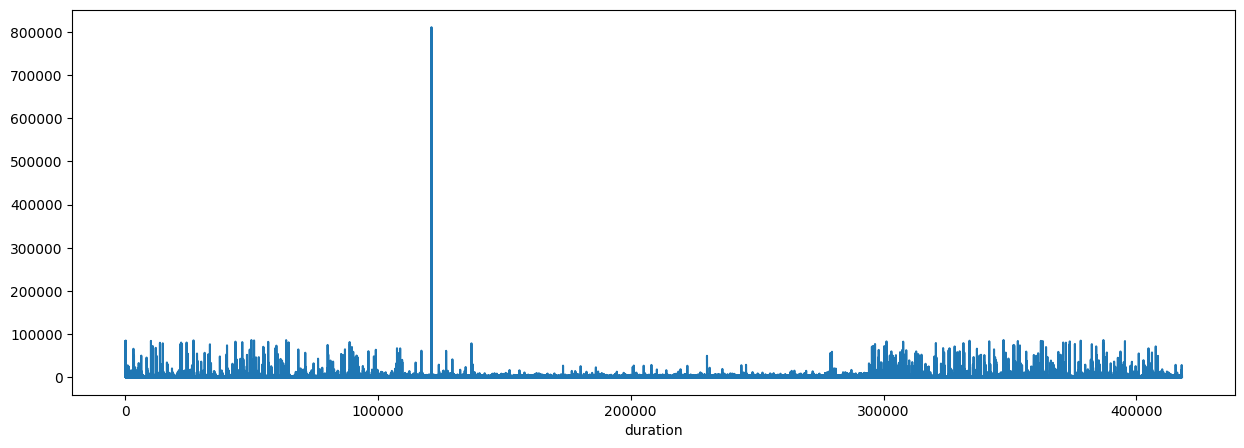

part 2


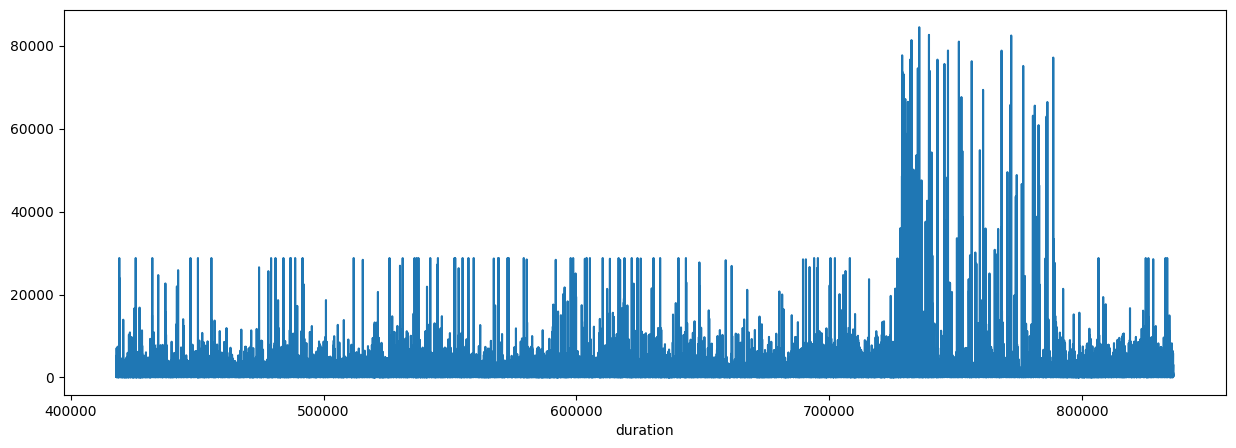

part 3


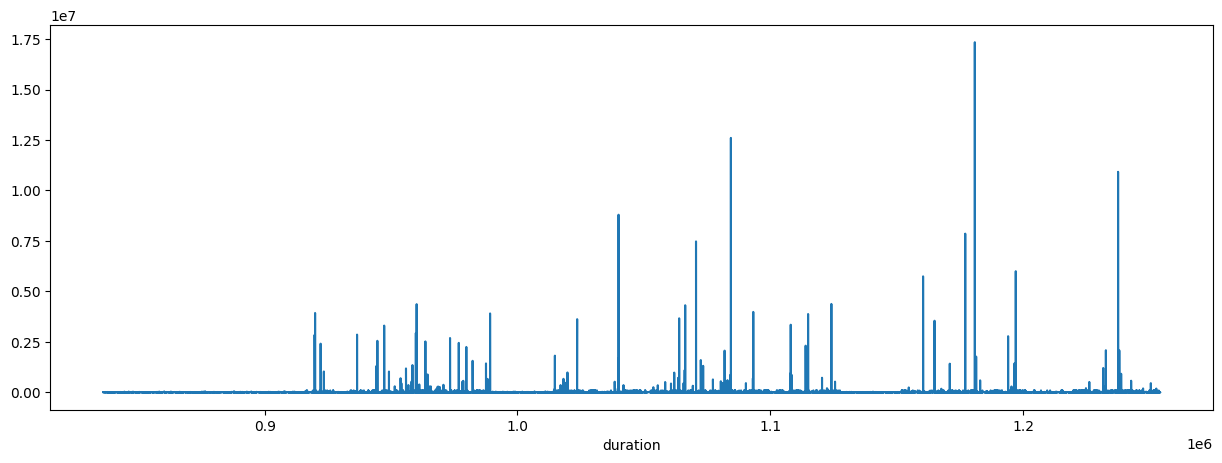

part 4


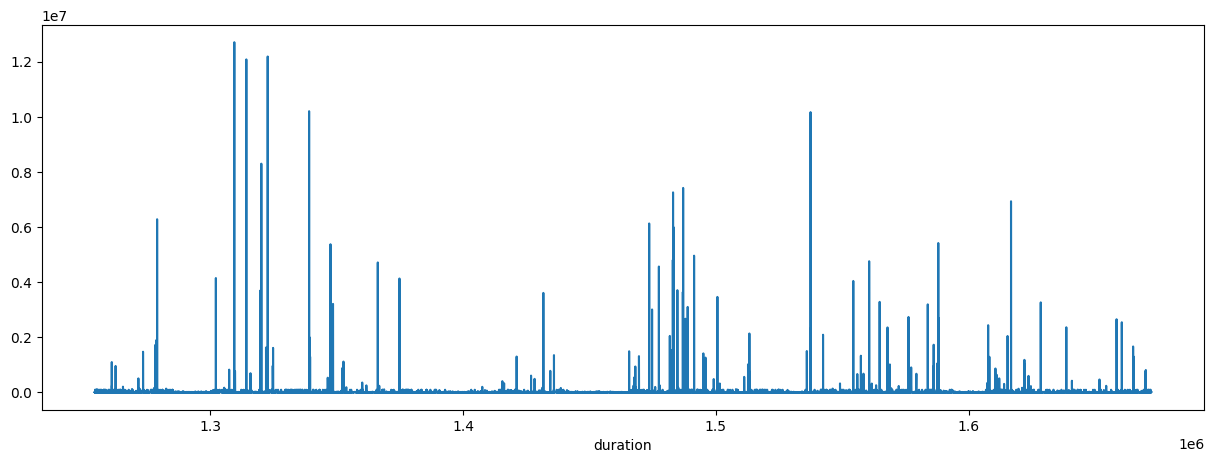

part 5


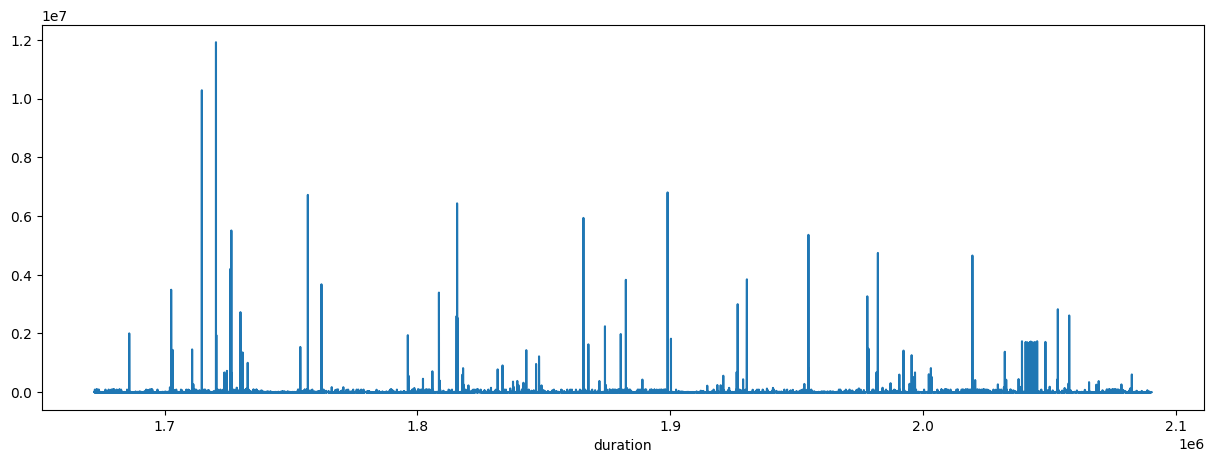

part 6


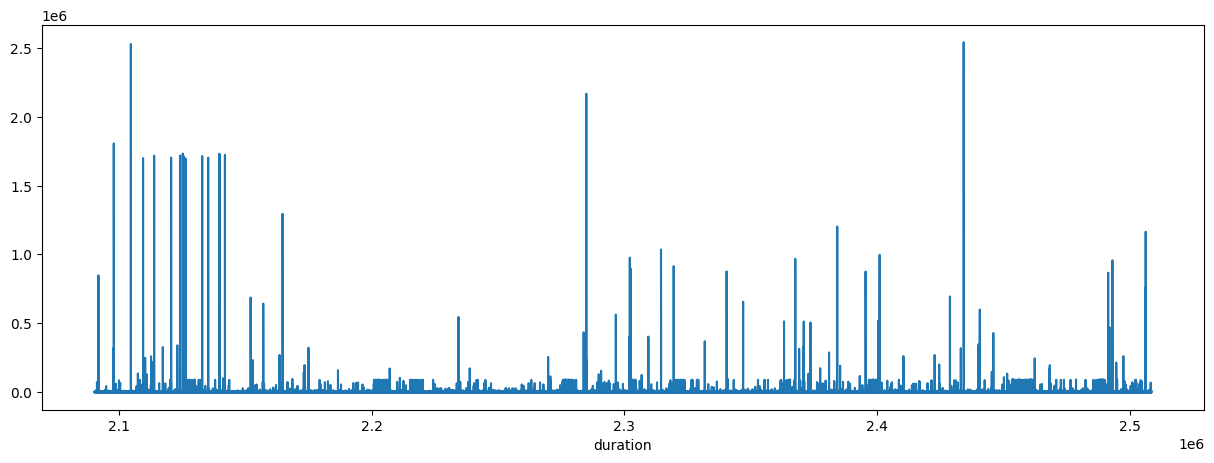

part 7


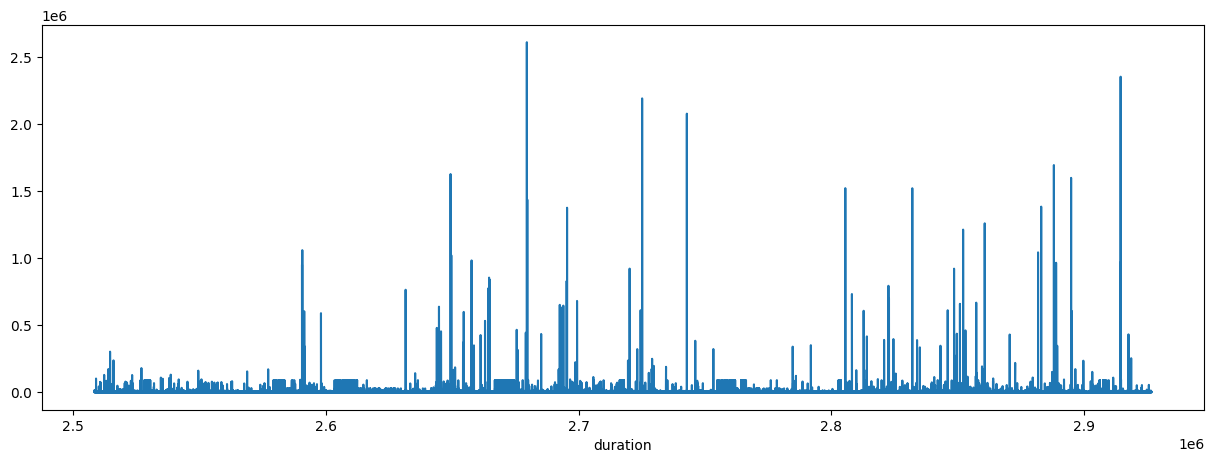

part 8


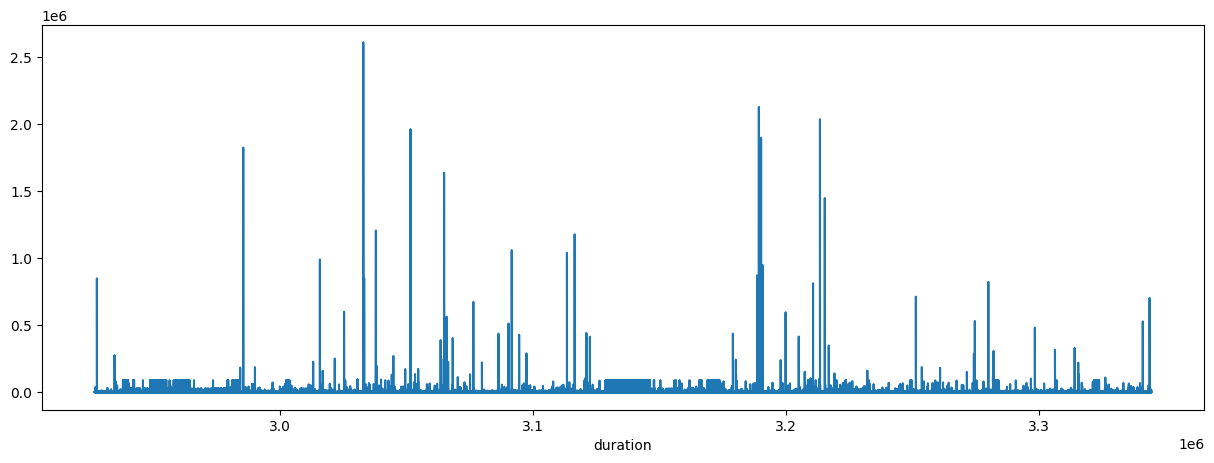

part 9


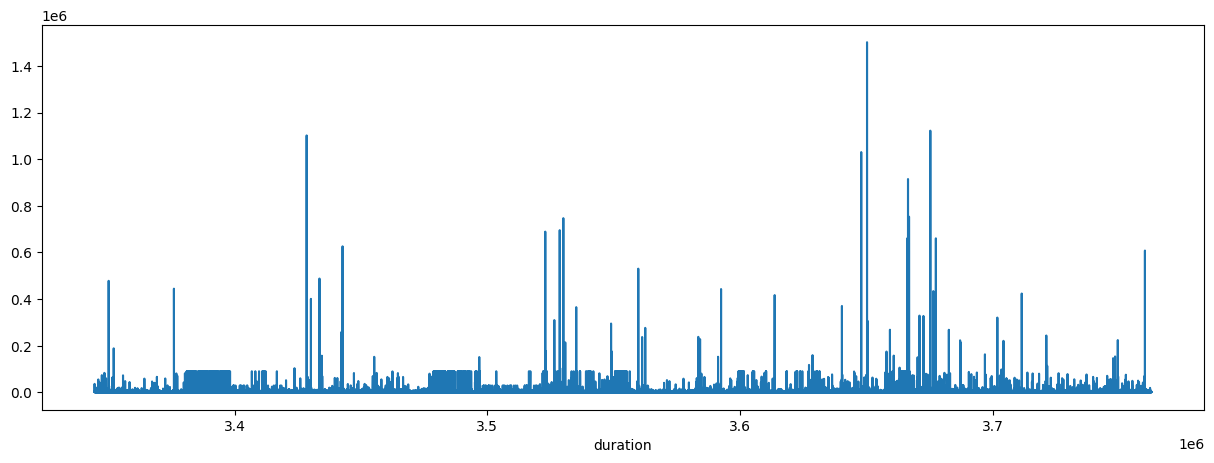

part 10


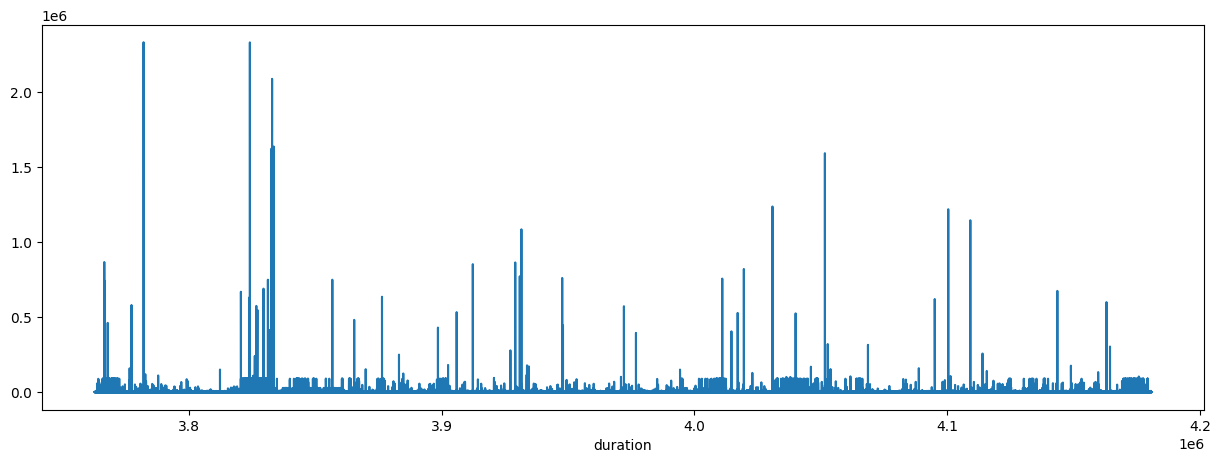

In [31]:
#zad2.4
start = 0
for part in range(1, 11):
    end = int(part/10*len(df["duration_sec"]))
    df["duration_sec"][start:end].plot(kind = "line", figsize=(15,5)).set(xlabel = "duration")
    start = end
    print(f"part {part}")
    plt.show()

In [19]:
#zad2.5
df["start_station_name"].value_counts()

Market St at 10th St                            44824
Powell St BART Station (Market St at 4th St)    32457
Powell St BART Station (Market St at 5th St)    27778
Market St at Steuart St                         26795
Berry St at 4th St                              26602
                                                ...  
SF Depot-2 (Minnesota St Outbound)                 11
MTL-ECO5-01                                         6
16th St Depot                                       2
San Jose Depot                                      2
Farnham St at Fruitvale Ave                         1
Name: start_station_name, Length: 503, dtype: int64

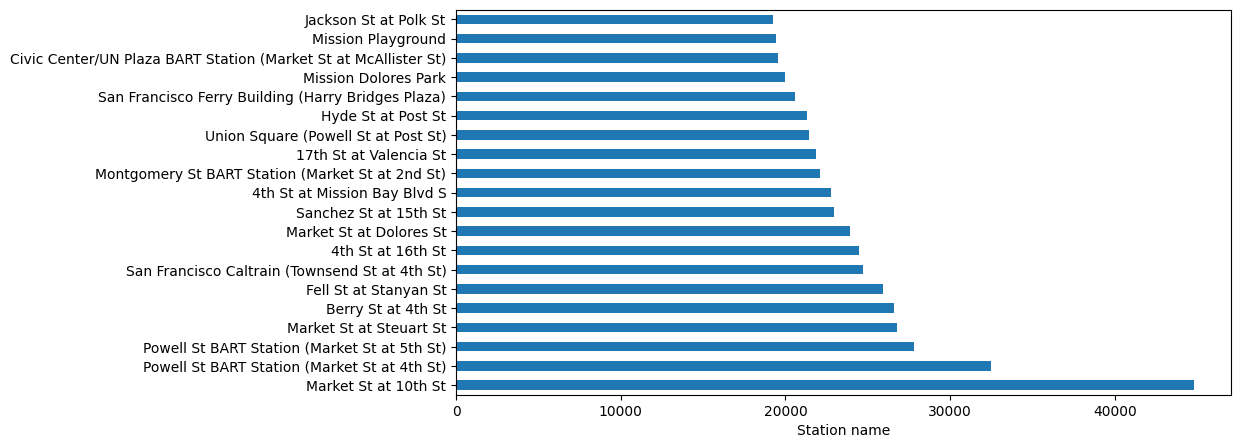

In [20]:
# all stations
# df['start_station_name'].value_counts().sort_values(ascending = False).plot(kind = 'barh' ,figsize = (10,100)).set(xlabel = 'Station name')
#slice 20
df['start_station_name'].value_counts().sort_values(ascending = False)[:20].plot(kind = 'barh' ,figsize = (10,5)).set(xlabel = 'Station name')

plt.show()

In [21]:
df['end_station_name'].value_counts()

Market St at 10th St                              43972
Powell St BART Station (Market St at 4th St)      35564
San Francisco Caltrain (Townsend St at 4th St)    32271
Market St at Steuart St                           28270
Powell St BART Station (Market St at 5th St)      28159
                                                  ...  
Virginia St at 2nd St                                 7
MTL-ECO5-01                                           6
Emeryville Depot                                      5
SF STATION IN A BOX 1                                 1
Farnham St at Fruitvale Ave                           1
Name: end_station_name, Length: 504, dtype: int64

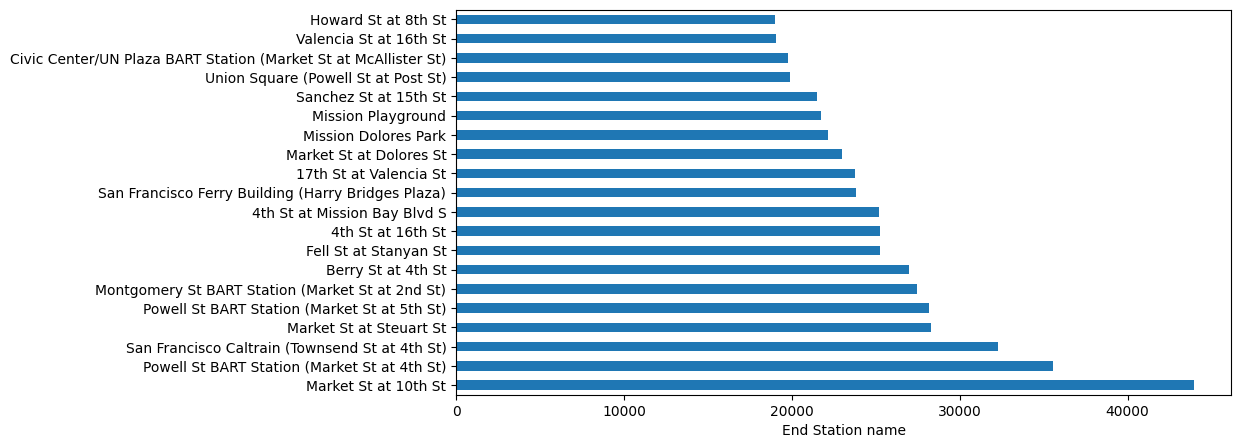

In [22]:
# all stations
# df['end_station_name'].value_counts().sort_values(ascending = False).plot(kind = 'barh' , figsize = (10,100)).set(xlabel = 'End Station name')
#slice 20
df['end_station_name'].value_counts().sort_values(ascending = False)[:20].plot(kind = 'barh' , figsize = (10,5)).set(xlabel = 'End Station name')
plt.show()

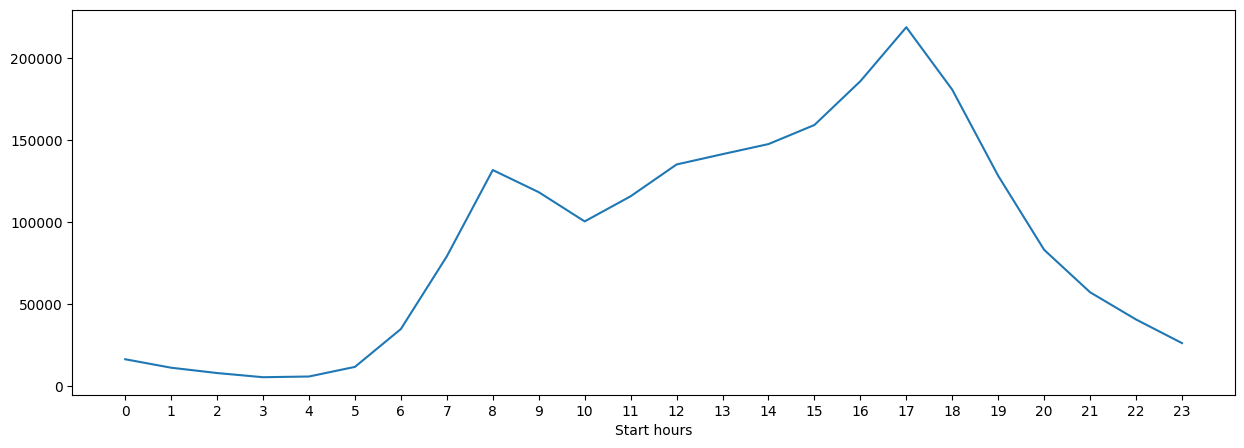

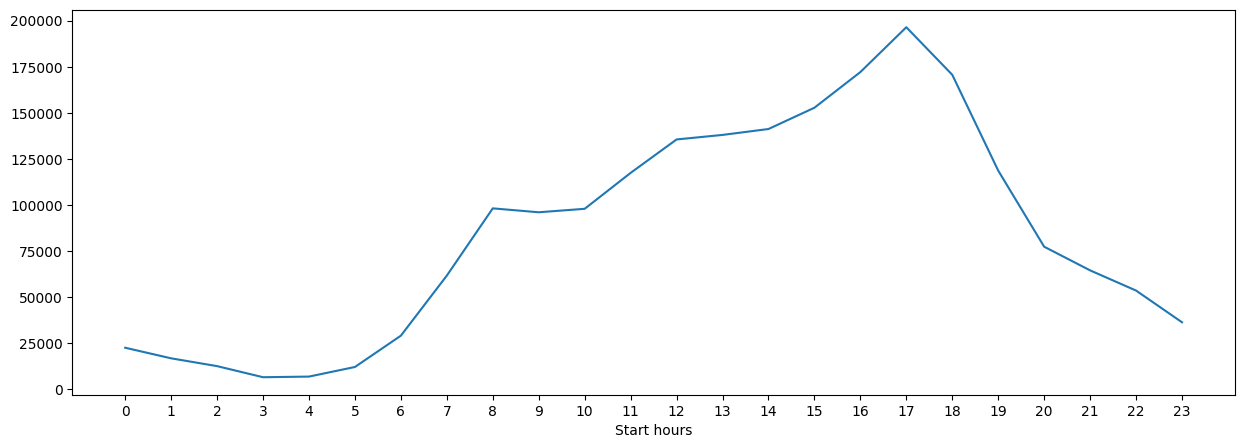

In [23]:
# zad2.6
years = [2020, 2021]
df["start_year"] = df["start_time"].dt.year
df["start_hour"] = df["start_time"].dt.hour

for year in years:
    df[df["start_year"] == year]["start_hour"].value_counts().sort_index().plot(kind = "line", figsize=(15,5)).set(xlabel = "Start hours")
    plt.xticks(range(0, 24))
    plt.show()

# df["start_hour"].value_counts().sort_index().plot(kind = "line", figsize=(15,5)).set(xlabel = "Start hours")
# plt.xticks(range(0, 24))
# plt.show()

In [24]:
peak_hour = df["start_hour"].value_counts().idxmax()
peak_hour

17

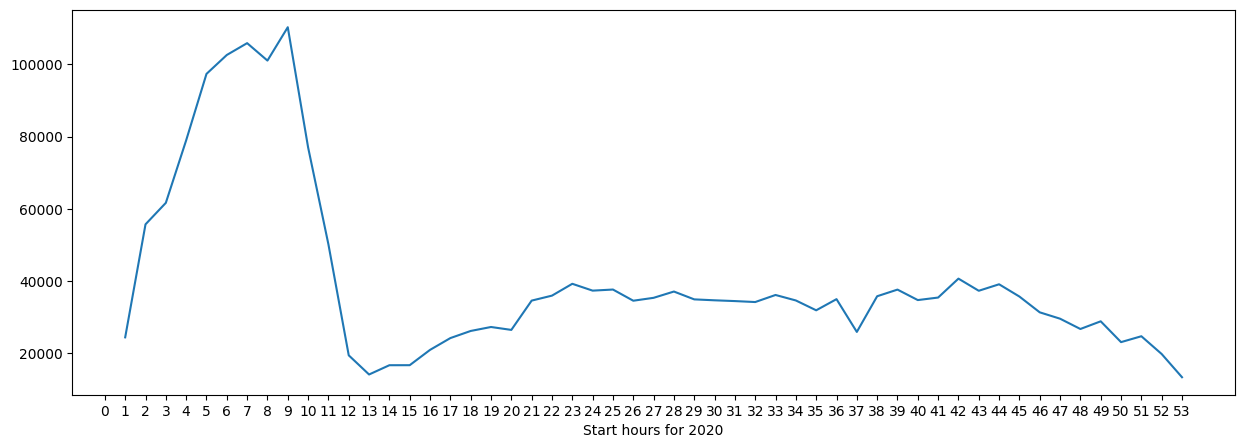

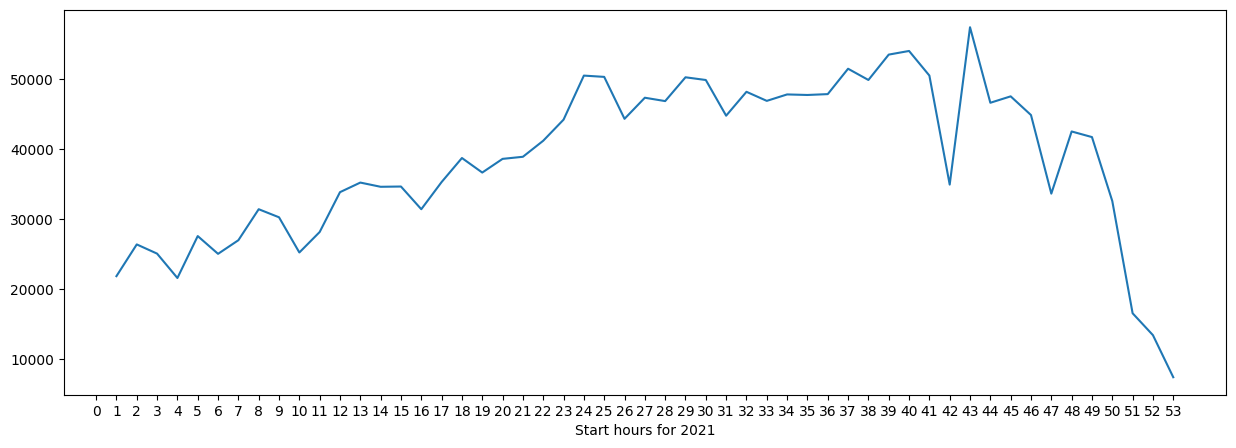

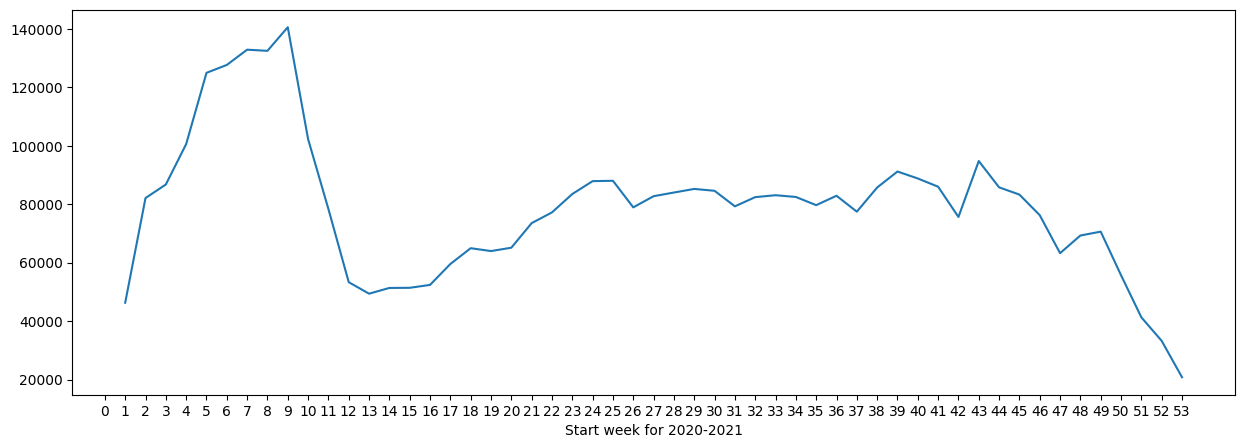

In [25]:
# zad2.7

years = [2020, 2021]
df["start_year"] = df["start_time"].dt.year
df["start_week"] = df["start_time"].dt.isocalendar().week

for year in years:
    df[df["start_year"] == year]["start_week"].value_counts().sort_index().plot(kind = "line", figsize=(15,5)).set(xlabel = f"Start hours for {year}")
    plt.xticks(range(0, 54))
    plt.show()

df["start_week"] = df["start_time"].dt.isocalendar().week
df["start_week"].value_counts().sort_index().plot(kind = "line", figsize=(15,5)).set(xlabel = "Start week for 2020-2021")
plt.xticks(range(0, 54))
plt.show()

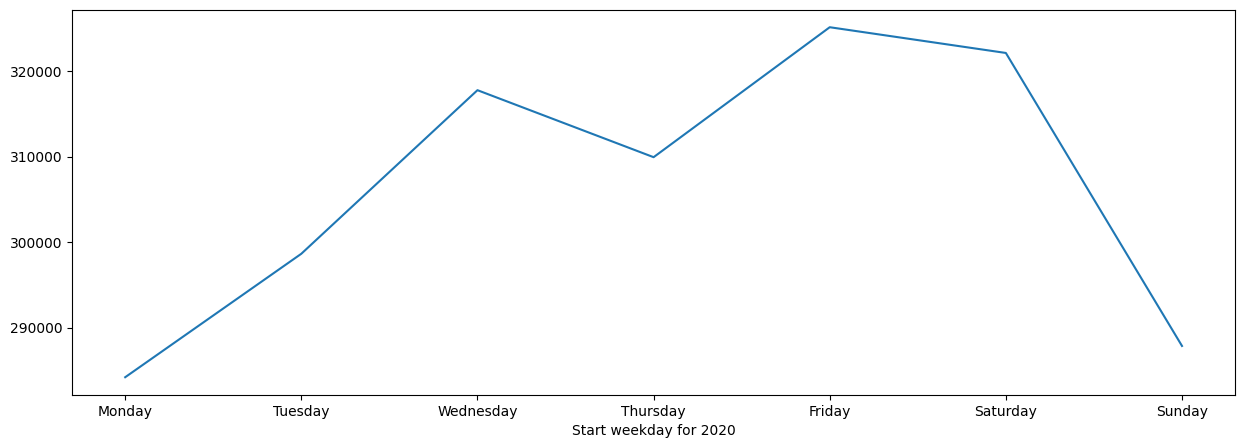

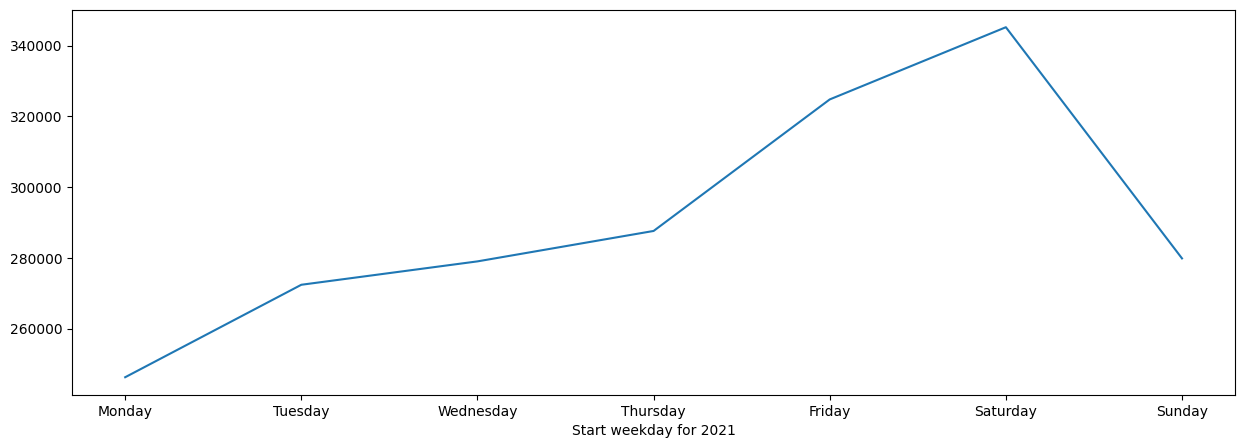

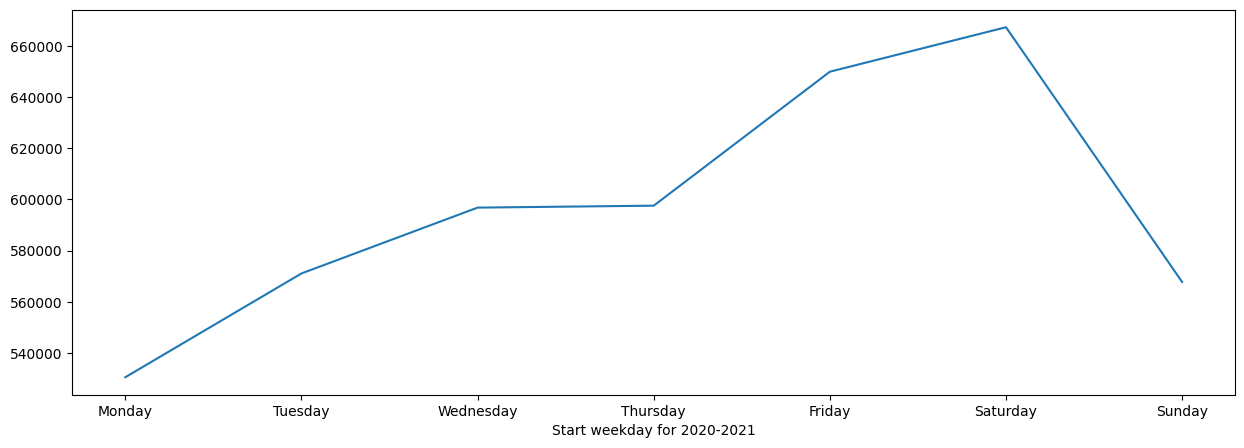

In [34]:
years = [2020, 2021]
df["start_year"] = df["start_time"].dt.year
df["start_weekday"] = df["start_time"].dt.weekday

for year in years:
    df[df["start_year"] == year]["start_weekday"].value_counts().sort_index().plot(kind = "line", figsize=(15,5)).set(xlabel = f"Start weekday for {year}")
    weekday_name = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    plt.xticks(range(0, 7), weekday_name)
    plt.show()


df["start_weekday"] = df["start_time"].dt.weekday
df["start_weekday"].value_counts().sort_index().plot(kind = "line", figsize=(15,5)).set(xlabel = "Start weekday for 2020-2021")
weekday_name = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.xticks(range(0, 7), weekday_name)
plt.show()